# Visualización con *salary.csv*

El dataset *salary.csv* contiene salarios de profesores universitarios de una universidad de Estados Unidos. Nos han solicitado analizar gráficamente el dataset y detectar discrepancias de ingresos entre grupos distintos.

### Importamos los paquetes requeridos 

In [1]:
# Paquetes numéricos y estadísticos
import numpy as np
import scipy.stats as stats

# Pandas maneja la carga y manipulación del dataset
import pandas as pd

# Funciones de plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar matplotlib para que se muestre en la notebook
%matplotlib inline

### Cargamos los datos

In [2]:
# Cargá el dataset con pandas 
salary = pd.read_csv('../Data/salary.csv')

In [3]:
# Chequeá las primeras líneas del dataset
salary.head()

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


* ¿El nombre de las columnas es suficientemente claro? 

In [4]:
# Imprimí la lista de nombres de columnas
list(salary)

['sx', 'rk', 'yr', 'dg', 'yd', 'sl']

In [5]:
# Empleá el el comando .info() para caracterizar los datos del dataframe
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
sx    52 non-null object
rk    52 non-null object
yr    52 non-null int64
dg    52 non-null object
yd    52 non-null int64
sl    52 non-null int64
dtypes: int64(3), object(3)
memory usage: 2.5+ KB


Como conocemos al información de antemano, podemos renombar las columnas para evitar malos entendidos a posteriori. El código para esto es:

```salary.columns = ['gender', 'professor_rank', 'years_in_job', 'degree_level', 'years_since_degree', 'yearly_salary']```

In [6]:
# Renombrá los títulos de columnas según la lista de arriba
salary.columns = ['gender', 'professor_rank', 'years_in_job', 'degree_level', 'years_since_degree', 'yearly_salary']

In [7]:
# Usá .head() para chequear el cambio
salary.head()

,gender,professor_rank,years_in_job,degree_level,years_since_degree,yearly_salary
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


#### Describa brevemente el dataset
En base a los resulados del método .info()

¿Qué información contiene? 

¿Cuántos casos? 

¿Qué tipo de datos posee?



### Ploteo exploratorio de los datos

#### Scatter plot de 'antigüedad en el puesto de trabajo' y 'salario anual'

In [8]:
# Construí un subset con los datos que registran variables de interés
years_in_job = salary.years_in_job.values
yearly_salary = salary.yearly_salary.values

In [9]:
# Chequeá qué forma tienen estos datos
years_in_job.dtype

dtype('int64')

In [10]:
yearly_salary.dtype

dtype('int64')

In [11]:
# Corrobá documentación y opciones de ploteo 
plt.plot?

In [12]:
# Visualizamos las dos series que creamos arriba en un scatter plot con estrellitas azules

# Recordá mostrar el gráfico!

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


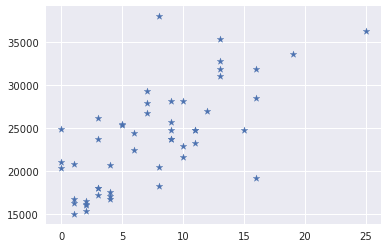

In [13]:
plt.scatter(years_in_job, yearly_salary, marker="*")
plt.show()

¿Consideras adecuado el tamaño de la imagen? ¿Y el tipo o el color del marcador?

In [14]:
# Buscá opciones de visualización de esta imagen
plt.figure?

In [15]:
plt.show?

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


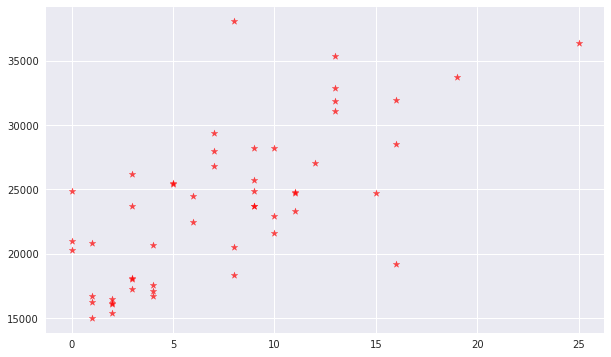

In [16]:
# Agrandá la imagen y modificá los marcadores, elegí la forma y el color que prefieras
plt.figure(figsize=(10,6))
plt.scatter(years_in_job, yearly_salary, marker="*", color="red", alpha=0.7)

In [17]:
# Indagá sobre opciones de leyendas y etiquetas
plt.xlabel?
#plt.title?

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


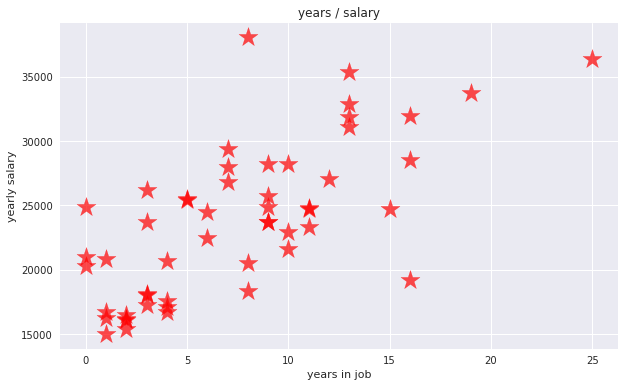

In [18]:
# Replicá el gráfico anterior, incluyendo nombres de los ejes y título al gráfico

# Aumentamos el tamaño de los puntos

# Nombre eje x

# Nombre eje y

# Título del gráfico

plt.figure(figsize=(10,6))
plt.scatter(years_in_job, yearly_salary, marker="*", color="red", alpha=0.7, s=400)
plt.ylabel('yearly salary')
plt.xlabel('years in job')
plt.title('years / salary')
plt.show()

#### Ahora exploremos alternativas con el comando sns.jointplot()

In [19]:
# Mirá el comando jointplot de seaborn
sns.jointplot?

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


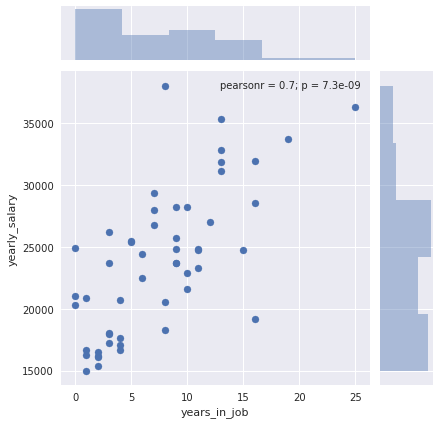

In [20]:
# Ploteá las dos variables de interés con sus respectivos histogramas
sns.jointplot(x="years_in_job", y="yearly_salary", data=salary)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


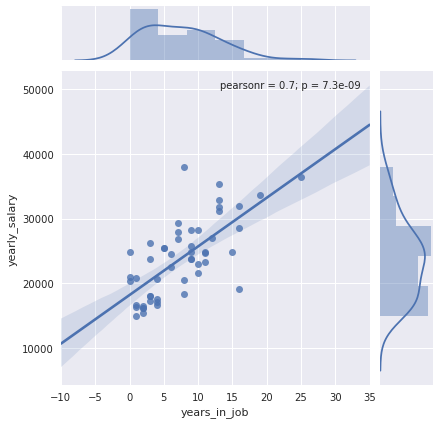

In [21]:
# Es posible incluir una regresión lineal entre ambas variables y su distribución conjunta
# Identificá qué opciones permite el argumento 'kind' del método joinplot() al respecto
sns.jointplot(x="years_in_job", y="yearly_salary", data=salary, kind="reg")

Aquí hemos trabajado con todos los datos de forma conjunta... pero esto no sería de gran ayuda si, por ejemplo, necesitáramos analizar las diferencias salariales por género o puesto de trabajo.

#### ¿Sabes que podemos visualizar *todas* las variables de forma conjunta, identificando relaciones por pares?
Para ello, aprendamos sobre sns.pairplot()

In [22]:
# Veamos de qué se trata el pairplot de seaborn
sns.pairplot?

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


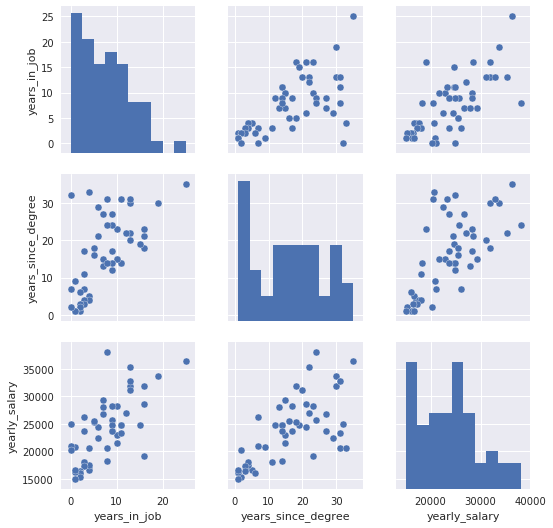

In [23]:
# Usemos un paneo global de las variables
sns.pairplot(salary)

Hemos perdido nuestras variables de interés... de las 6 columnas existentes en 'salary', sólo fue posible graficar 3, ¿por qué? ¿qué tipo de dato contienen estas variables? ¿y las omitidas?

### Retomemos nuestro análisis... 

### Ploteo desagregado por categorías

In [24]:
# Definí un subset de nuestro dataset
subset = salary[['gender','professor_rank','years_in_job','yearly_salary']] # pido columnas dentro del corchete
subset.head()

,gender,professor_rank,years_in_job,yearly_salary
0,male,full,25,36350
1,male,full,13,35350
2,male,full,10,28200
3,female,full,7,26775
4,male,full,19,33696


#### Box plots

In [25]:
# Exploremos la documentación del boxplot de seaborn
sns.boxplot?

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


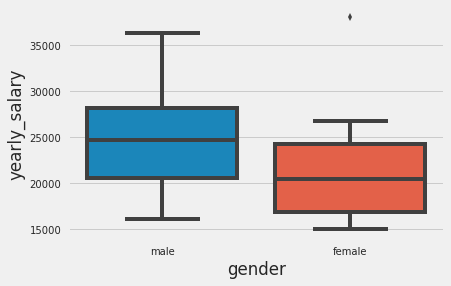

In [55]:
# Analicemos 'salary' según 'gender' con un boxplot: queremos ver cómo se comporta la variable "salary" en cada
# categoría de género.
sns.boxplot(y="yearly_salary", x="gender", data=salary)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


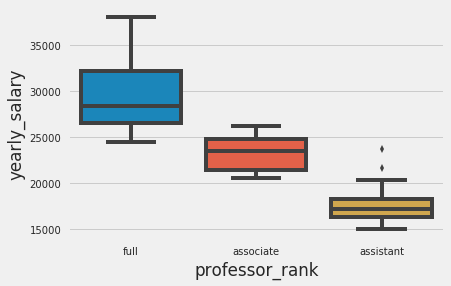

In [54]:
# Realicemos este mismo estudio según 'professor_rank'
sns.boxplot(y="yearly_salary", x="professor_rank", data=salary)

A primera vista, será necesario profundizar nuestro entendimiento sobre las diferencias salariales entre las categorías de 'gender' y 'professor_rank'. Para ello, nos sería de suma utilidad discriminar categorías por forma o color para plotearlas conjuntamente y, a la vez, identificar subgrupos.

Veamos cuán factible es combinar ambas variables categóricas...

#### Gráfico de barras

In [28]:
# Complementariamente, esta información se puede presentar en un gráfico de barras donde gender separe dos
# subgrupos y el color esté dado por proffesor_rank
sns.barplot?

* ¿La media per se refleja la heterogeneidad de cada subgrupo?

Para acceder a los valores de la columna podemos usar:

* ```salary['gender'].values```

In [29]:
# Identifiquemos las categorías que se encuentran presentes en las variables gender y professor_rank
gender = salary.gender.values
rank = salary.professor_rank.values

# Identificamos las categorías únicas
gender_values = np.unique(gender)
rank_values = np.unique(rank)

print("Valores de Gender: ", gender_values)
print("Valores de Rank: ", rank_values)

Valores de Gender:  ['female' 'male']
Valores de Rank:  ['assistant' 'associate' 'full']


In [45]:
# veamos de qué se trata el FacetGrid de seaborn
sns.FacetGrid?

In [48]:
subset.head()

,gender,professor_rank,years_in_job,yearly_salary
0,male,full,25,36350
1,male,full,13,35350
2,male,full,10,28200
3,female,full,7,26775
4,male,full,19,33696


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


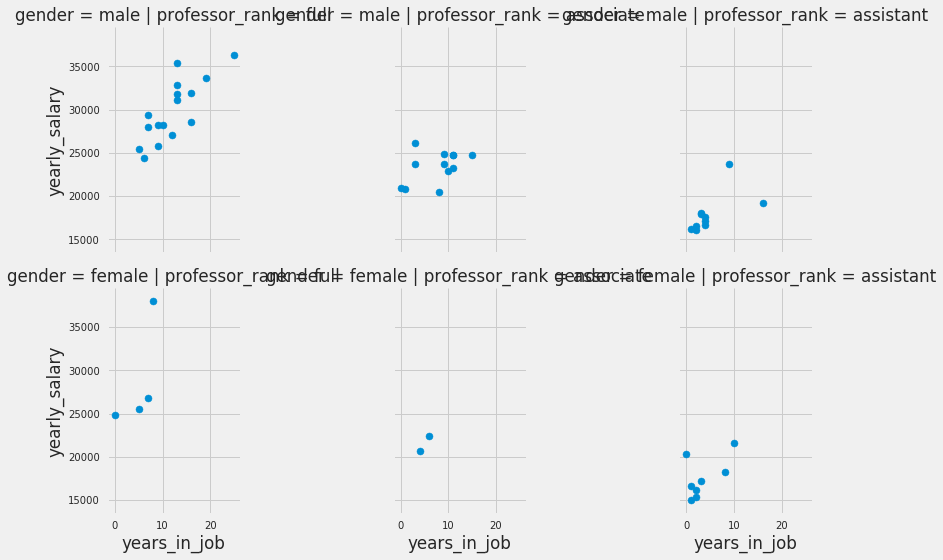

In [53]:
# con FACETGRID podemos plotear todas las combinaciones posibles a partir de las categorías de nuestras variables
# Utilicemos este método para graficar un scatterplot que vincule "years_in_job" con "yearly_salary" para cada 
# combinación posible de gender y profesor_rank
g = sns.FacetGrid(subset, row="gender", col="professor_rank", size=4)
g.map(plt.scatter, "years_in_job", "yearly_salary")

#### Scatter plot combinado

Este scatter plot combinado es otra forma de ver la relación entre antigüedad y salario desagregada por género y posición. Intentemos entender línea por línea ¿Qué está haciendo el siguiente código? 

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


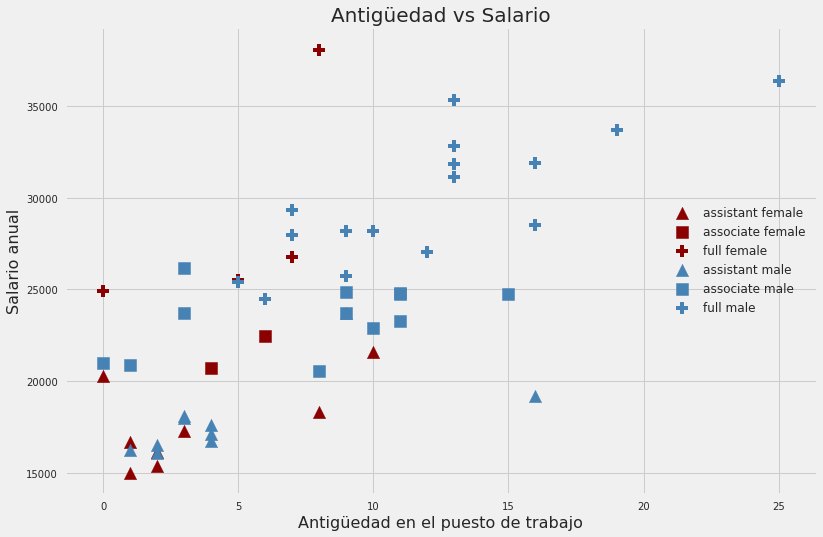

In [32]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))
axes = fig.gca()

# a partir de las nuevas variables, generamos un loop
for g in gender_values:
    if g == 'female':
        color = 'darkred'
    elif g == 'male':
        color = 'steelblue'
        
    for r in rank_values:        
        if r == 'full':
            # Representa el punto como un '+'
            point_marker = '+'
        elif r == 'associate':
            # Representa el punto como un cuadrado ('s' de square en inglés)
            point_marker = 's'
        elif r == 'assistant':
            # Representa el punto como un triangulo con punta hacia arriba
            point_marker = '^'
            
        current_years = [y for y, g_, r_ in zip(years_in_job, gender, rank) if g_ == g and r_ == r]
        current_salaries = [s for s, g_, r_ in zip(yearly_salary, gender, rank) if g_ == g and r_ == r]

        axes.scatter(current_years, current_salaries, c=color, marker=point_marker, s=150,
                     label=' '.join([r, g]))

axes.set_title('Antigüedad vs Salario', fontsize=20)
axes.set_xlabel('Antigüedad en el puesto de trabajo', fontsize=16)
axes.set_ylabel('Salario anual', fontsize=16)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = {l:h for l, h in zip(labels, handles)}
plt.legend(by_label.values(), by_label.keys(), loc = 'center right', fontsize=12)